In [1]:
import matplotlib.pyplot as plt
import yaml
import pandas as pd
%matplotlib inline

plt.style.use('ggplot')



plt.style.use('seaborn-whitegrid')
plt.rcParams['font.size'] = 35
plt.rcParams['pdf.fonttype'] = 42
# colors = [
#     "#1F4690", # oneadapt
#     "#576F72", # baseline 1
#     "#850E35", # baseline 2
#     "#614124", # baseline 3
# ]
colors = [
    '#004daf',
    '#ed1b3a',
    '#ff9900',
    '#33a02c',
    '#fabeaf',
    '#aad59b'
]
bandwidth = 20 * 1000 * 1000 / 8 # 20 Mbps
inference = 0.05
latency = 0.03 # 30ms network latency

def savefig(filename, fig):
    import time
    timestr = time.strftime("%Y%m%d-%H%M%S")
    fig.savefig(f'{filename}_time_{timestr}.pdf', bbox_inches='tight')
    fig.savefig(f'{filename}.pdf', bbox_inches='tight')

In [2]:

def read_approach(name):
    with open(name, 'r') as f:
        x = pd.DataFrame.from_dict(yaml.load(f.read()))
        x = x.groupby(['second', 'input']).last().reset_index()
        x = x[x.input != '/dataheart/dataset/downtown/downtown_1/part%d.mp4']
        print(len(x))
        return x
    

oneadapt = {}
for lq in [0.05, 0.2]:
    oneadapt[lq] = read_approach(f'/dataheart/kuntai_recovery/code/baseline_stat/macroblk/oneadapt_macroblock_thresh_{lq}.yaml')

# dds = {}
# for lq in [28,30,32]:
#     dds[lq] = read_approach(f'/dataheart/kuntai_recovery/code/baseline_stat/dds/dds_lq_{lq}.yaml')
dds = {}
for lq in [30,34]:
    dds[lq] = read_approach(f'/dataheart/kuntai_recovery/code/baseline_stat/dds/dds_higherhq_lq_{lq}.yaml')
    
eaar = {}
for lq in [28,30,32]:
    eaar[lq] = read_approach(f'/dataheart/kuntai_recovery/code/baseline_stat/eaar/eaar_lq_{lq}.yaml')

accmpeg = {}
for lq in [32, 38, 44]:
    accmpeg[lq] = read_approach(f'/dataheart/kuntai_recovery/code/baseline_stat/accmpeg/accmpeg_thresh_0.15_lq_{lq}.yaml')
# for lq in [30, 50]:
#     accmpeg[lq] = read_approach(f'/dataheart/kuntai_recovery/code/baseline_stat/accmpeg_test/accmpeg_thresh_0.15_lq_{lq}.yaml')

/dataheart/kuntai_recovery/envs/diff/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


1071
1071
1071
1071
1071
1071
1071
1071
1071
1071


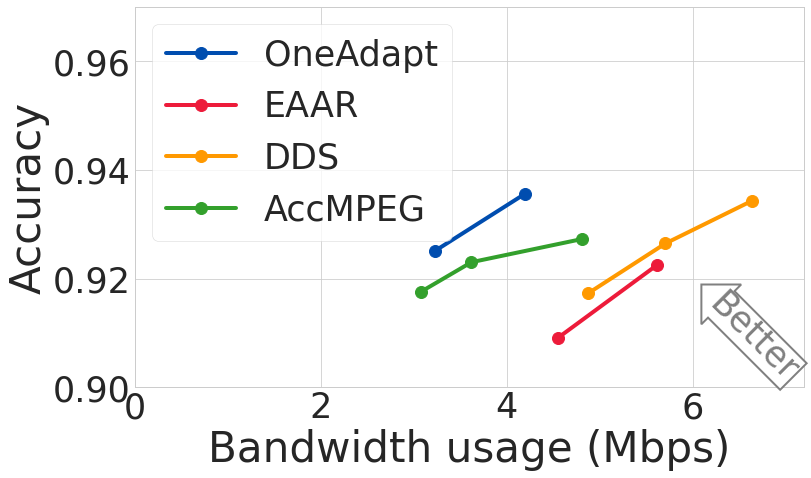

In [3]:

import numpy as np
# fmt = '/dataheart/dataset/rural/rural_1/part%d.mp4'

fig, ax = plt.subplots(figsize=(12, 7))

x = oneadapt
ax.plot([x[i].bandwidth.mean() * 8 / 1e6 for i in x], 
        [x[i].f1.mean() for i in x],
        label='OneAdapt', c=colors[0], marker='o', linewidth=4, markersize=12)


x = dds
ax.plot([x[i].bandwidth.mean() * 8 / 1e6 for i in x], 
        [x[i].f1.mean() for i in x],
        label='EAAR', c=colors[1], marker='o', linewidth=4, markersize=12)


x = eaar
ax.plot([x[i].bandwidth.mean() * 8 / 1e6 for i in x], 
        [x[i].f1.mean() for i in x],
        label='DDS', c=colors[2], marker='o', linewidth=4, markersize=12)


x = accmpeg
ax.plot([x[i].bandwidth.mean() * 8 / 1e6 for i in sorted(x.keys())], 
        [x[i].f1.mean() for i in sorted(x.keys())],
        label='AccMPEG', c=colors[3], marker='o', linewidth=4, markersize=12)

# print(x[36].bandwidth.mean())

ax.legend(frameon=True)

ax.set_xlabel('Bandwidth usage (Mbps)')
ax.set_ylabel('Accuracy')
ax.set_xlim(left=0)



l, r = 0, 7.2
b, u = 0.9, 0.97

ax.set_xlim(l,r)
ax.set_ylim(b,u)

bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
t = ax.text(r,b, "Better", ha="right", va="bottom", rotation=-45,
            bbox=bbox_props, c='grey')

bb = t.get_bbox_patch()
bb.set_boxstyle("larrow", pad=0.05)

ax.legend(loc=2,frameon=True)
    

In [9]:
savefig('/home/kuntai/paper/OneAdapt-SIGCOMM-23/figs/tradeoff-macroblock-bandwidth', fig)

119
EAAR done


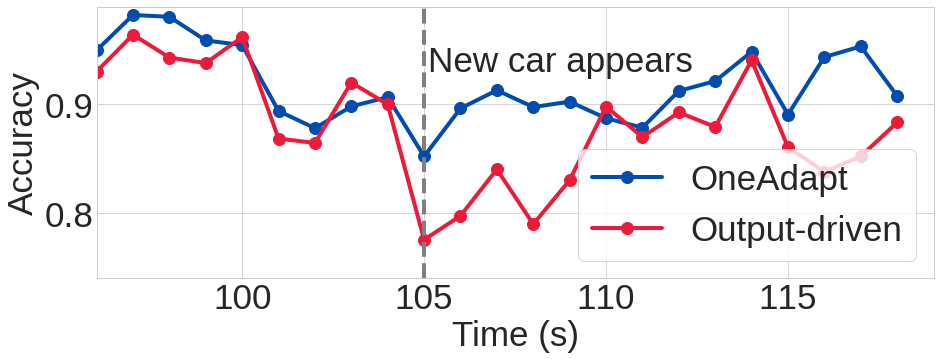

In [74]:


import numpy as np
fmt = '/dataheart/dataset/downtown/downtown_9/part%d.mp4'

fig, ax = plt.subplots(figsize=(15, 5))

# idxs = list(range(10))
# idxs = list(range(10))
idxs = [6]


x=[]
# for thresh in [0.00625, 0.05, 0.2]:
for thresh in [0.05]:
    
    y = []

    
    for idx in idxs:
        fmt = f'/dataheart/dataset/downtown/downtown_{idx}/part%d.mp4'

        x = query_approach2(fmt, f'oneadapt_macroblock_thresh_{thresh}')


print(len(x))
ax.plot(range(len(x)), [i['f1'] for i in x], label='OneAdapt', c=colors[0], marker='o', linewidth=4, markersize=12)




x = []
for lq in [36]:


    for idx in idxs:
        fmt = f'/dataheart/dataset/downtown/downtown_{idx}/part%d.mp4'
        x = query_approach2(fmt, f"eaar_lq_{lq}")

ax.plot(range(len(x)), [i['f1'] for i in x], label='Output-driven', c=colors[1], marker='o', linewidth=4, markersize=12)

print('EAAR done')






# ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Accuracy')
ax.set_xlim(96, 119)
ax.set_ylim(0.74, 0.99)
# ax.set_yticks([0.9, 0.92, 0.94, 0.96, 0.98])

ax.axvline(x = 105, color = 'grey', linestyle='dashed', linewidth=4)
ax.text(105.1,0.93, 'New car appears',horizontalalignment='left')
# ax.axvline(x = 113, color = 'grey', linestyle='dashed', linewidth=4)
# ax.text(112.5,0.55, 'New car\nappears',horizontalalignment='right')

# bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
# t = ax.text(r,b, "Better", ha="right", va="bottom", rotation=-45,
#             bbox=bbox_props, c='grey')

# bb = t.get_bbox_patch()
# bb.set_boxstyle("larrow", pad=0.05)

ax.legend(frameon=True)

In [70]:
savefig('/home/kuntai/paper/DiffAdapt-HotNets/figs/adaptation-RGB-macroblock', fig)